In [1]:
import blocksci
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
%matplotlib notebook

# parser_data_directory should be set to the data-directory which the blocksci_parser output
chain = blocksci.Blockchain("/blocksci/bitcoin.json")

In [25]:
# Find all transactions that inputted into 1Fs

# 1. find active timeframe for 1Fs
# 2. find/plot # of addresses that aggregate into 1Fs 
# 3. find/plot time between aggregation transaction into 1Fs and then that BTC being spent
# 4. find/plot time between initial BTC-E wallet receiving money and then getting aggregated
# 5. find/plot amount of bitcoin that gets aggregated into 1Fs each time
# 6. find if the aggregation wallets are "fresh" - created within x time of getting used in aggregation
# or the number of transactions the aggregation wallets have, total

# this is a model to model BTC-e transactions that follow the 1Fs pattern. (aggregation)
# then run this model on the entire blockchain and see if that maps to BTC-E transactions
# improve the model with the addition of peel chain detection


In [4]:
address = chain.address_from_string("1FsVcdeHbpvUVT3gjeuVR2ZSDnpcsJMsLL")
# cluster = cm.cluster_with_address(address)

# get all transactions where 1Fs is an output (these should be BTC-E aggregation transactions)
# let's call all aggregation inputs into 1Fs as "AggIns"
print(address.out_txes_count()) # returns a list of transactions

print(np.mean(address.out_txes.input_count))
print(np.mean(address.out_txes.input_count[:-51]))
print(np.mean(address.out_txes.input_count[-51:]))
# Blockchain.info: 30379 total transactions, both in and out

15783
19.560919977190647
19.59973302822273
7.588235294117647


In [27]:
address.in_txes_count() # where 1Fs spent money!

14596

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.39 µs
7.588235294117647


<IPython.core.display.Javascript object>


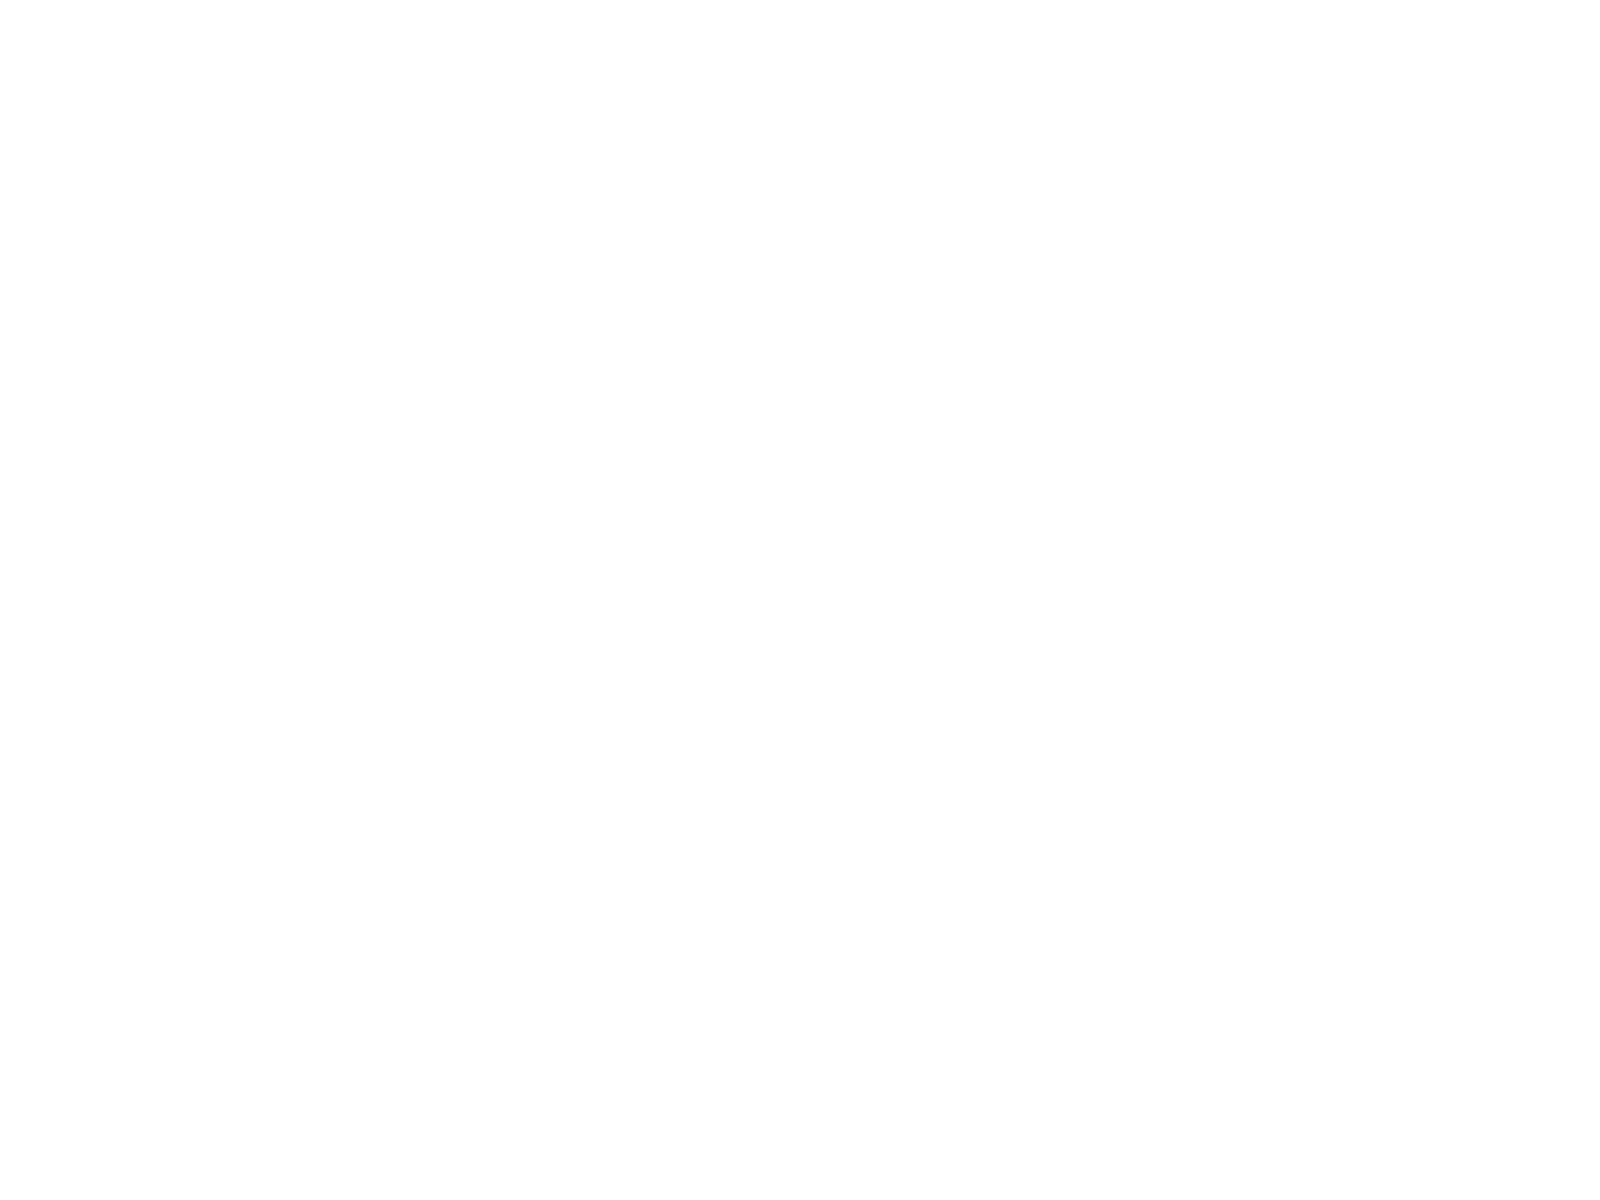

In [28]:
# the # of inputs for the most recent 51 transactions
allTx = address.out_txes
allAggIns = address.out_txes.input_count[-51:]

%time inputs = allAggIns

print(np.mean(inputs))

times = allTx.block_time[-51:]

# df = pd.DataFrame({"Inputs":inputs/1e8}, index=times)
# ax = df.resample("d").mean().plot()
# ax.set_ylim(0)
x = times
y = inputs

colors =(0,0,0)
area = np.pi*3  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.xlim(0, 2000)
# plt.plot()

plt.tick_params(axis='x', which='major', labelsize=9, rotation=50)
plt.tight_layout()

In [29]:
# this is a list of all the aggregation transactions
allTx = address.out_txes
print(np.mean(address.out_txes.input_count))

allAggIns = address.out_txes.input_count[:-51]
len(allAggIns)
# address.out_txes.to_list() 

19.560919977190647


15732

In [30]:
# iterate across transactions, and count # of addresses 
# we know that these probably all are BTC-E
sum(allAggIns)


308343

In [31]:
# 2. find the average # of inputs in aggregation transaction
# plot this, as # of inputs, over time

# allAggIns is a list of transactions that I need to plot

# take out most recent 51 transactions... 
%time inputs = allAggIns
times = allTx.block_time[:-51]

x = times
y = inputs

colors =(0,0,0)
area = 1  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.xlim(0, 2000)
# plt.plot()

plt.tick_params(axis='x', which='major', labelsize=9, rotation=50)
plt.tight_layout()

# df = pd.DataFrame({"Inputs":inputs}, index=times)
# ax = df.resample("d").mean().plot()
# ax.set_ylim(0)
# plt.plot()
plt.savefig('graph.svg', format='svg', dpi=1200)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.4 µs
['2014-07-21T07:44:08.000000000' '2014-07-21T07:59:47.000000000'
 '2014-07-21T07:59:47.000000000' ... '2015-01-17T07:49:24.000000000'
 '2015-01-20T13:02:52.000000000' '2015-01-20T13:02:52.000000000']


<IPython.core.display.Javascript object>


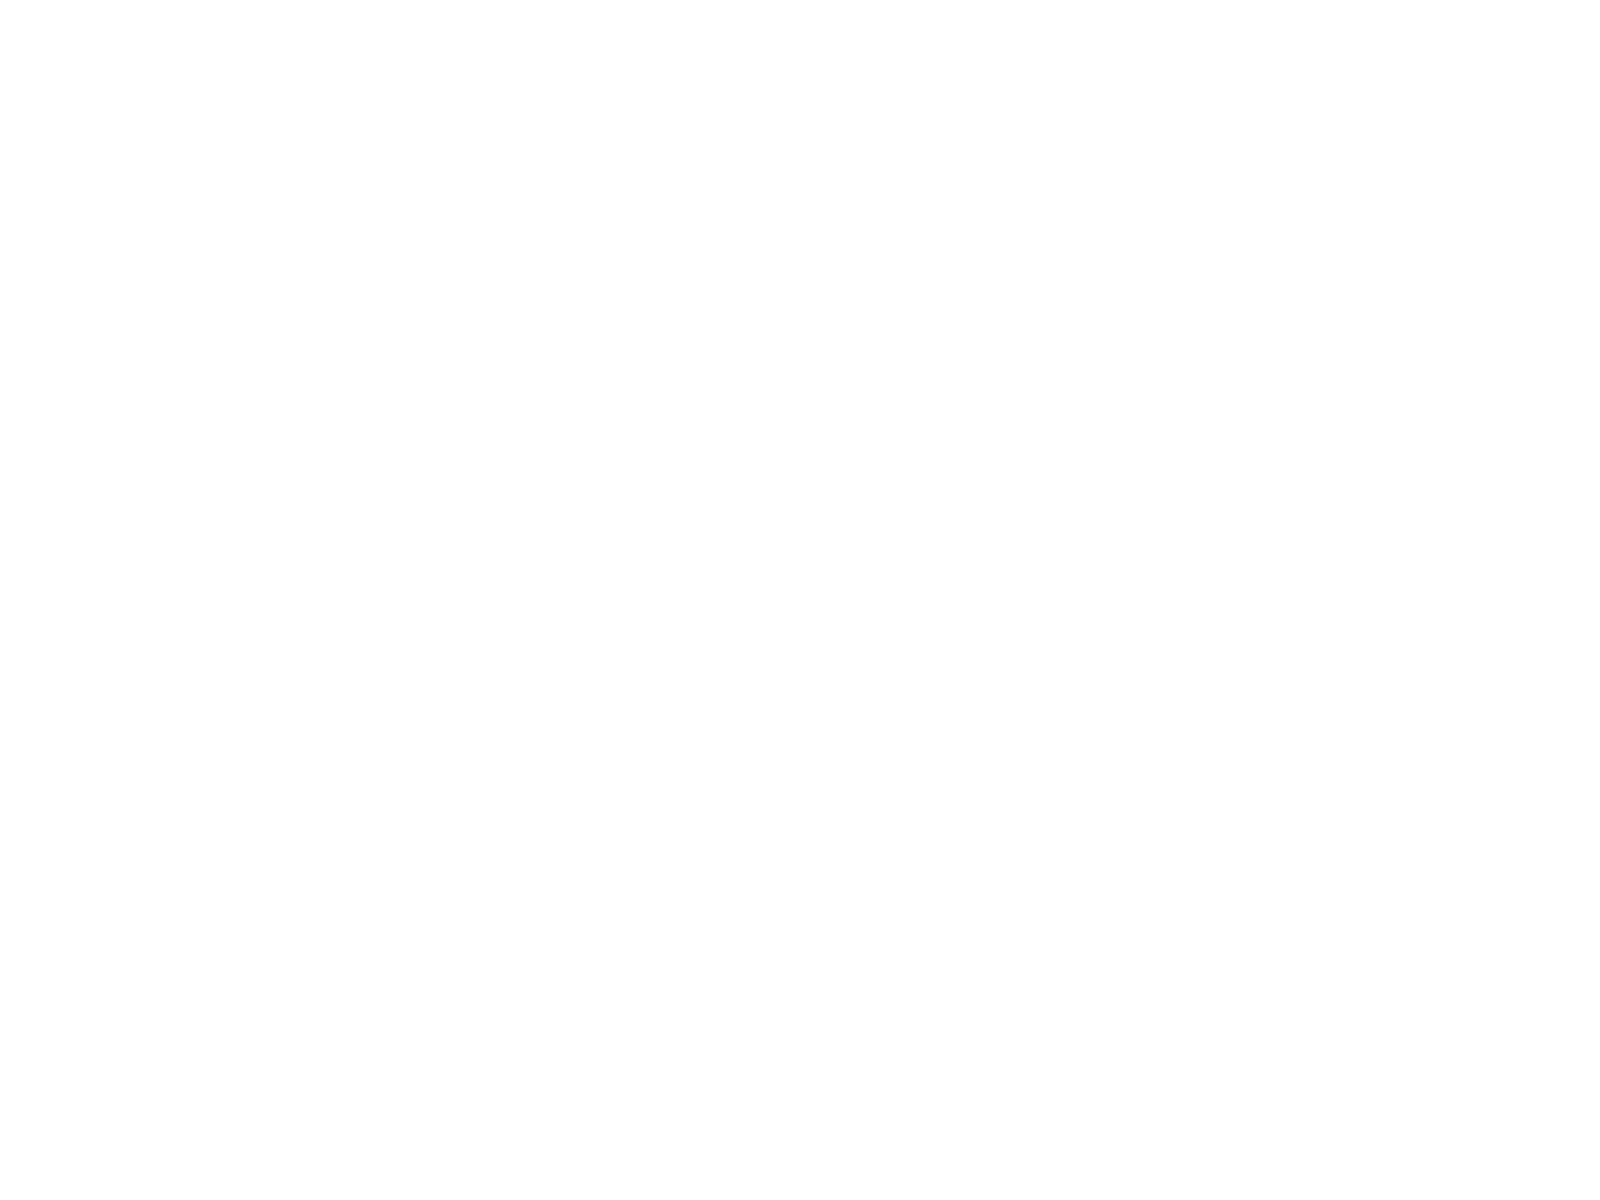

19.59973302822273

In [32]:
# 2. find the average # of inputs in aggregation transaction
# plot this, as # of inputs, over time

# allAggIns is a list of transactions that I need to plot

# take out most recent 51 transactions... 
%time inputs = allAggIns
times = allTx.block_time[:-51]
print(times)
# x = times
# y = inputs

# colors =(0,0,0)
# area = np.pi*3  # 0 to 15 point radii

# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.xlim(0, 2000)
# plt.plot()

# plt.tick_params(axis='x', which='major', labelsize=9, rotation=50)
# plt.tight_layout()

df = pd.DataFrame({"Inputs":inputs}, index=times)
ax = df.resample("d").mean().plot()
ax.set_ylim(0)
plt.plot()

np.mean(inputs)

In [33]:
# 2. find the average # of inputs in aggregation transaction
# plot this, as # of inputs, over time

# allAggIns is a list of transactions that I need to plot

# take out most recent 51 transactions... 
%time inputs = address.out_txes.input_count
times = allTx.block_time

x = times
y = inputs

colors =(0,0,0)
area = 0.1  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.xlim(0, 2000)
# plt.plot()

plt.tick_params(axis='x', which='major', labelsize=9, rotation=50)
plt.tight_layout()

# df = pd.DataFrame({"Inputs":inputs}, index=times)
# ax = df.resample("d").mean().plot()
# ax.set_ylim(0)
# plt.plot()

CPU times: user 192 ms, sys: 0 ns, total: 192 ms
Wall time: 192 ms


ValueError: Unrecognizable date '2014-07-21T07:44:08.000000000'

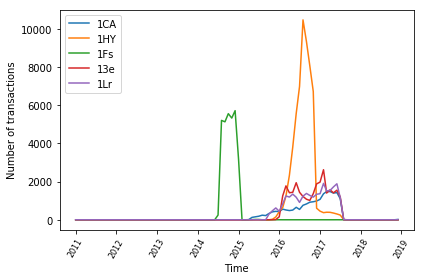

In [26]:
# 1 plot the # of transactions over time
import datetime

address = chain.address_from_string("1CAJWsyuyd7LymX8wmjF2Ss1DczKriPmvW")
allTx = address.txes() 
    
buckets = {}

allMonths = []

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

allDates = ["{year}-{month}".format(year=year, month=month) for year in years for month in months]

# Initializing all dates to zero
for date in allDates:
    dateAsDatetime = datetime.datetime.strptime(date, '%Y-%m')
    buckets[dateAsDatetime] = 0


for tx in allTx:
    truncatedDate = "{year}-{month}".format(year=tx.block_time.year, month=tx.block_time.month)
    tD = datetime.datetime.strptime(truncatedDate, '%Y-%m')
    buckets[tD] += 1

lists = sorted(buckets.items())

xy = zip(*lists)

plt.xlabel("Time")
plt.ylabel("Number of transactions")
plt.plot(*xy, label="1CA")
plt.tick_params(axis='x', which='major', labelsize=8, rotation=60)



address = chain.address_from_string("1HY5d1jkiTA5C2Utss9kUvVVHWJo5UrEFD")
allTx = address.txes() 
    
buckets = {}

allMonths = []

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

allDates = ["{year}-{month}".format(year=year, month=month) for year in years for month in months]

# Initializing all dates to zero
for date in allDates:
    dateAsDatetime = datetime.datetime.strptime(date, '%Y-%m')
    buckets[dateAsDatetime] = 0

for tx in allTx:
    truncatedDate = "{year}-{month}".format(year=tx.block_time.year, month=tx.block_time.month)
    tD = datetime.datetime.strptime(truncatedDate, '%Y-%m')
    buckets[tD] += 1

lists = sorted(buckets.items())

xy = zip(*lists)

plt.xlabel("Time")
plt.ylabel("Number of transactions")
plt.plot(*xy, label="1HY")
plt.tick_params(axis='x', which='major', labelsize=8, rotation=60)



address = chain.address_from_string("1FsVcdeHbpvUVT3gjeuVR2ZSDnpcsJMsLL")
allTx = address.txes() 
    
buckets = {}

allMonths = []

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

allDates = ["{year}-{month}".format(year=year, month=month) for year in years for month in months]

# Initializing all dates to zero
for date in allDates:
    dateAsDatetime = datetime.datetime.strptime(date, '%Y-%m')
    buckets[dateAsDatetime] = 0

for tx in allTx:
    truncatedDate = "{year}-{month}".format(year=tx.block_time.year, month=tx.block_time.month)
    tD = datetime.datetime.strptime(truncatedDate, '%Y-%m')
    buckets[tD] += 1

lists = sorted(buckets.items())

xy = zip(*lists)

plt.xlabel("Time")
plt.ylabel("Number of transactions")
plt.plot(*xy, label="1Fs")
plt.tick_params(axis='x', which='major', labelsize=8, rotation=60)


address = chain.address_from_string("13eh4wPLe1nCsh8FXJNpL6e9D1edWNT1Ub")
allTx = address.txes() 
    
buckets = {}

allMonths = []

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

allDates = ["{year}-{month}".format(year=year, month=month) for year in years for month in months]

# Initializing all dates to zero
for date in allDates:
    dateAsDatetime = datetime.datetime.strptime(date, '%Y-%m')
    buckets[dateAsDatetime] = 0

for tx in allTx:
    truncatedDate = "{year}-{month}".format(year=tx.block_time.year, month=tx.block_time.month)
    tD = datetime.datetime.strptime(truncatedDate, '%Y-%m')
    buckets[tD] += 1

lists = sorted(buckets.items())

xy = zip(*lists)

plt.xlabel("Time")
plt.ylabel("Number of transactions")
plt.plot(*xy, label="13e")
plt.tick_params(axis='x', which='major', labelsize=8, rotation=60)


address = chain.address_from_string("1Lrp3685NBEoGNjtJok1TcYapwUsxf9gPB")
allTx = address.txes() 
    
buckets = {}

allMonths = []

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

allDates = ["{year}-{month}".format(year=year, month=month) for year in years for month in months]

# Initializing all dates to zero
for date in allDates:
    dateAsDatetime = datetime.datetime.strptime(date, '%Y-%m')
    buckets[dateAsDatetime] = 0

for tx in allTx:
    truncatedDate = "{year}-{month}".format(year=tx.block_time.year, month=tx.block_time.month)
    tD = datetime.datetime.strptime(truncatedDate, '%Y-%m')
    buckets[tD] += 1

lists = sorted(buckets.items())

xy = zip(*lists)

plt.xlabel("Time")
plt.ylabel("Number of transactions")
plt.plot(*xy, label="1Lr")

plt.tick_params(axis='x', which='major', labelsize=8, rotation=60)

plt.legend(loc='upper left')

plt.tight_layout()

plt.savefig('times.svg', format='svg', dpi=1200)

plt.show()

In [ ]:
# 3. find/plot time between aggregation transaction into 1Fs and then that BTC being spent
# the time of the transaction, to the next transaction after (where it's spent)



In [ ]:
# 4. find/plot time between initial BTC-E wallet receiving money and then getting aggregated


In [5]:
# 5. find/plot amount of bitcoin that gets aggregated into 1Fs each time
allTx = address.out_txes # this is an iterator
allAggIns = address.out_txes.input_value
print(allAggIns)
print(sum(allAggIns))
print(sum(allAggIns)/1e8)
print(sum(allAggIns)/len(allAggIns))
print((sum(allAggIns)/len(allAggIns))/1e8)

print(min(allAggIns)/1e8)
print(max(allAggIns)/1e8)

minIn = np.argmin(allAggIns)
maxIn = np.argmax(allAggIns)
"{} and {}".format(minIn, maxIn)
print(minIn)
print(maxIn)

# print(allTx[minIn])

for i, t in enumerate(allTx): 
#     print(i)
    if (i == minIn):
        print(t.hash)
        print("min")
        
    if (i == maxIn):
        print(t.hash)
        print("max")

# the mean aggregated amount is 40.8
# according to blockchain.info, amount of received BTC = 652,354.17043337 BTC


[   10010000 20296546207  3098676731 ...     8934046     2105902
       15000]
65806214505987
658062.14505987
4169436387.6314387
41.694363876314384
0.0001
2409.30859328
8447
11294
d74c581d2410ffa3e9c28e25576f055869302e9fad817e853bd9a45fac82fbe1
min
7e874d11ad4a530b660be83770d52787de60a5da00ee35e6f64fddb7d516b9a5
max


15732
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs
15732


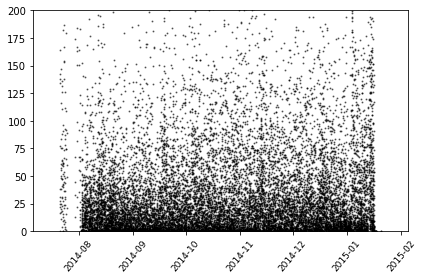

In [10]:
# so plot time with amount from allAggIns
allTx = address.out_txes # this is an iterator
allAggIns = address.out_txes.input_value

allAggIns = allAggIns[:-51]
print(len(allAggIns))

%time inputs = allAggIns
# print(allAggIns)
times = allTx.block_time[:-51]
print(len(times))

# df = pd.DataFrame({"Amounts aggregated":inputs/1e8}, index=times)
# ax = df.resample("d").mean().plot()
# ax.set_ylim(0)
# plt.plot()

x = times
y = inputs

colors =(0,0,0)
area = 1  # 0 to 15 point radii

plt.scatter(x, y/1e8, s=area, c=colors, alpha=0.5)
plt.ylim(0, 200)

plt.tick_params(axis='x', which='major', labelsize=9, rotation=50)
plt.tight_layout()

plt.savefig('graph1.svg', format='svg', dpi=1200)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


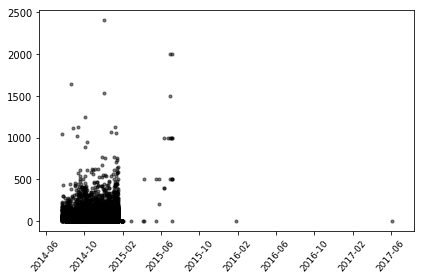

In [9]:
# so plot time with amount from allAggIns over ALL!!
allTx = address.out_txes # this is an iterator
allAggIns = address.out_txes.input_value

# allAggIns = allAggIns[:-51]
# print(len(allAggIns))

%time inputs = allAggIns
# print(allAggIns)
times = allTx.block_time
# print(len(times))

# df = pd.DataFrame({"Amounts aggregated":inputs/1e8}, index=times)
# ax = df.resample("d").mean().plot()
# ax.set_ylim(0)
# plt.plot()

x = times
y = inputs

colors =(0,0,0)
area = np.pi*3  # 0 to 15 point radii

plt.scatter(x, y/1e8, s=area, c=colors, alpha=0.5)
# plt.xlim(0, 2000)
# plt.plot()

plt.tick_params(axis='x', which='major', labelsize=9, rotation=50)
plt.tight_layout()


In [ ]:
# 6. find if the aggregation wallets are "fresh" - created within x time of getting used in aggregation
# or the number of transactions the aggregation wallets have, total


In [ ]:
# 7. amount of bitcoin each aggregation wallet contributes as input

In [2]:
1+1

2